# Connect to twitter

In [1]:
import pickle
import tweepy
import re #https://developers.google.com/edu/python/regular-expressions
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt

Loading the policians:

In [2]:
data=pd.read_csv("danish_politkere_twitter.csv")

In [3]:
twitter_name_list=list(data["Twittername"])

Using: Lauskij@gmail.com

In [4]:
#Load keys (everytime except first)
with open('api_key_Lau.data', 'rb') as filehandle:
    api_key = pickle.load(filehandle) 
with open('api_key_secret_Lau.data', 'rb') as filehandle:
    api_secret_key = pickle.load(filehandle)
with open('access_token_Lau.data', 'rb') as filehandle:
    access_token = pickle.load(filehandle)
with open('access_token_secret_Lau.data', 'rb') as filehandle:
    access_token_secret = pickle.load(filehandle)

In [5]:
'''
# replace these values with yours
api_key = "W5HqKzagyeIERb5x6YrTLQwmu"
api_secret_key = "41FBUJTpqF2qjTTNYHxkjPqkIBDXKcfDTc5oMZYzLoYaEfN220"
access_token = "1228302223647682561-UOTpnbrw1VjOAP1zQBhnvVmOloXMvk"
access_token_secret = "tAbFRWC65NkKRgsGxEmHNamb6mXWN1jqisRMMw5xjTZo8"


#Save keys (once)
with open('api_key_Lau.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(api_key, filehandle)
with open('api_key_secret_Lau.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(api_secret_key, filehandle)
with open('access_token_Lau.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(access_token, filehandle)
with open('access_token_secret_Lau.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(access_token_secret, filehandle)
'''

Create API object

In [5]:
# Creating the authentication object
auth = tweepy.OAuthHandler(api_key, api_secret_key)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth)

Collecting posts:

In [15]:
# The Twitter user who we want to get tweets from
name = "vestager"
# Number of tweets to pull
tweetCount = 20

# Calling the user_timeline function with our parameters
tweets = api.user_timeline(id=name, count=tweetCount,tweet_mode='extended')

# foreach through all tweets pulled
for tweet in tweets:
    # printing the text stored inside the tweet object
    print(tweet.full_text)
    print(80 * '-')

RT @vonderleyen: I am shocked and saddened by the brutal attack that took place in Vienna. My thoughts are with the families of the victims…
--------------------------------------------------------------------------------
No #EUGreenDeal is possible without #DigitalEU. Thank you @BertelsmannFdn, all #EUDialogues participants and @VSinkevicius for a very engaging discussion &amp; looking forward to pursuing it! https://t.co/0rwXkWS2hp
--------------------------------------------------------------------------------
Getting ready for #EUDialogues @BertelsmannSt with @VSinkevicius on #EUGreenDeal https://t.co/j4T4S6i4VH
--------------------------------------------------------------------------------
In my mind no doubt that platforms - and the algorithms they use - can have an enormous impact on the way we see the world around us. We need to know why we are shown what we are shown.

https://t.co/5FHSXQlPBQ
--------------------------------------------------------------------------------
We 

In [68]:
#tweet_dict={name:{"Mentioned":{},"Text":{}}}

#dict

#    Navn
#       Tag_person : text_for_opslag
#       Tag_person : text_for_opslag
#       Tag_person : text_for_opslag

tweet_dict={name:{}}

In [71]:
#Example: mentioned, text
tweet_dict[name].update({"Hans erling":"Dette er en masse opslgscontent"})

In [72]:
tweet_dict

{'vestager': {'Hans erling': 'Dette er en masse opslgscontent'}}

In [ ]:
#Resettet
tweet_dict={name:{}}

In [73]:
for i,tweet in enumerate(tweets):
    # printing the text stored inside the tweet object
    
    
    
    opslag=tweet.full_text
    
    match=re.findall(r"@\w+",opslag)
    
    if len(match)>0:
        
        
        #Note first run
        first_run=1
        
        for a in range(len(match)):
            uden_snabela=str(match[a]).replace("@","")
            if uden_snabela in twitter_name_list:
                
                if first_run==1:
                    print(80 * '=')
                    print("The {}th tweet mentions a politician:".format(i))
                    
                    #Save the to "Vesterager dict"
                    tweet_dict[name].update({uden_snabela:opslag})
                    
                    #Update dummy. Not first run anymore
                    first_run=0
                
                print(uden_snabela)
                
        #Only print content if there has been a run        
        if first_run==0:
            print(80 * '=')
            print(opslag)
            print(80 * '-')
        
        

The 9th tweet mentions a politician:
SchaldemoseMEP
karmel80
#HybridDebate @SchaldemoseMEP: What is illegal off line should also be illegal online - consumers needs protection 
@karmel80 Removal of content should not be by filters but a transparent process involving humans.
Inspiring debat @Europarl_EN https://t.co/jp52cg5Lck
--------------------------------------------------------------------------------
The 11th tweet mentions a politician:
SchaldemoseMEP
@SchaldemoseMEP Selvfølgelig skynder vi os! Til dato har vi godkendt mere end 350 hjælpeordninger i EU - mere end 20 i DK. Tit på ganske få dage. Så sent som i fredags godkendte vi to danske ordninger, den ene er lønkompensation til virksomheder, der ikke kan holde åbent pga corona.
--------------------------------------------------------------------------------
The 18th tweet mentions a politician:
oestergaard
sofiecn
sofiecn
@oestergaard @radikale @sofiecn Ja, @sofiecn er god! Inddragende, principiel, dedikeret - og giver plads ti

In [75]:
tweet_dict.keys()

dict_keys(['vestager'])

In [78]:
tweet_dict['vestager'].keys()

dict_keys(['Hans erling', 'SchaldemoseMEP', 'oestergaard'])

# Download it for three persons:

In [6]:
tweet_dict={"Dummy":{}}

In [7]:
three_persons=list(data["Twittername"])

In [8]:
n_count=0
n_total=len(three_persons)
for p in three_persons:   
    n_count=n_count+1
    print("Loading {} / {}".format(n_count,n_total))


    # The Twitter user who we want to get tweets from
    name = p
    # Number of tweets to pull
    tweetCount = 100

    try:
    # Calling the user_timeline function with our parameters
        tweets = api.user_timeline(id=name, count=tweetCount,tweet_mode='extended')




        ##Updating dict
        tweet_dict.update({name:{}})


        ###############========== FINDING TWEETS FOR PERSON=============#####

        for i,tweet in enumerate(tweets):
        # printing the text stored inside the tweet object



                opslag=tweet.full_text

                match=re.findall(r"@\w+",opslag)

                if len(match)>0:


                    #Note first run
                    first_run=1

                    for a in range(len(match)):
                        uden_snabela=str(match[a]).replace("@","")
                        if uden_snabela in twitter_name_list:

                            if first_run==1:
                               # print(80 * '=')
                               # print("The {}th tweet mentions a politician:".format(i))

                                #Save the to "Vesterager dict"
                                tweet_dict[name].update({uden_snabela:opslag})

                                #Update dummy. Not first run anymore
                                first_run=0

                            #print(uden_snabela)

                    #Only print content if there has been a run        
                    #if first_run==0:
                       # print(80 * '=')
                       # print(opslag)
                        #print(80 * '-')
                        
    except:
        print("Error at {}".format(name))

        
        

Loading 1 / 650
Loading 2 / 650
Loading 3 / 650
Loading 4 / 650
Loading 5 / 650
Loading 6 / 650
Loading 7 / 650
Loading 8 / 650
Loading 9 / 650
Loading 10 / 650
Loading 11 / 650
Loading 12 / 650
Loading 13 / 650
Loading 14 / 650
Loading 15 / 650
Loading 16 / 650
Loading 17 / 650
Loading 18 / 650
Loading 19 / 650
Loading 20 / 650
Loading 21 / 650
Loading 22 / 650
Loading 23 / 650
Loading 24 / 650
Loading 25 / 650
Loading 26 / 650
Loading 27 / 650
Loading 28 / 650
Loading 29 / 650
Loading 30 / 650
Loading 31 / 650
Loading 32 / 650
Loading 33 / 650
Loading 34 / 650
Loading 35 / 650
Loading 36 / 650
Loading 37 / 650
Loading 38 / 650
Loading 39 / 650
Loading 40 / 650
Loading 41 / 650
Loading 42 / 650
Loading 43 / 650
Loading 44 / 650
Loading 45 / 650
Loading 46 / 650
Loading 47 / 650
Error at SosseSass
Loading 48 / 650
Loading 49 / 650
Loading 50 / 650
Loading 51 / 650
Loading 52 / 650
Loading 53 / 650
Loading 54 / 650
Loading 55 / 650
Loading 56 / 650
Loading 57 / 650
Loading 58 / 650
Load

Loading 453 / 650
Loading 454 / 650
Loading 455 / 650
Loading 456 / 650
Loading 457 / 650
Loading 458 / 650
Loading 459 / 650
Loading 460 / 650
Loading 461 / 650
Loading 462 / 650
Loading 463 / 650
Loading 464 / 650
Loading 465 / 650
Loading 466 / 650
Loading 467 / 650
Loading 468 / 650
Loading 469 / 650
Error at flemse68
Loading 470 / 650
Loading 471 / 650
Loading 472 / 650
Loading 473 / 650
Loading 474 / 650
Loading 475 / 650
Loading 476 / 650
Loading 477 / 650
Loading 478 / 650
Loading 479 / 650
Loading 480 / 650
Loading 481 / 650
Loading 482 / 650
Loading 483 / 650
Loading 484 / 650
Loading 485 / 650
Loading 486 / 650
Loading 487 / 650
Loading 488 / 650
Loading 489 / 650
Loading 490 / 650
Loading 491 / 650
Loading 492 / 650
Loading 493 / 650
Loading 494 / 650
Loading 495 / 650
Loading 496 / 650
Loading 497 / 650
Loading 498 / 650
Loading 499 / 650
Loading 500 / 650
Loading 501 / 650
Loading 502 / 650
Loading 503 / 650
Loading 504 / 650
Loading 505 / 650
Loading 506 / 650
Loading 50

In [9]:
del tweet_dict["Dummy"]

See the persons:

In [131]:
tweet_dict.keys()

dict_keys(['vestager', 'larsloekke', 'oestergaard'])

In [10]:
with open('tweet_dict.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(tweet_dict, filehandle)

Create the graph:

In [11]:
G=nx.DiGraph()

Make edge from person to the ones that have been mentioned (tagged with @):

In [12]:
for pol in list(tweet_dict.keys()):
    for to_pol in list(tweet_dict[pol].keys()):
        G.add_edge(pol,to_pol)

In [13]:
nx.write_gpickle(G, "first_network.gpickle")

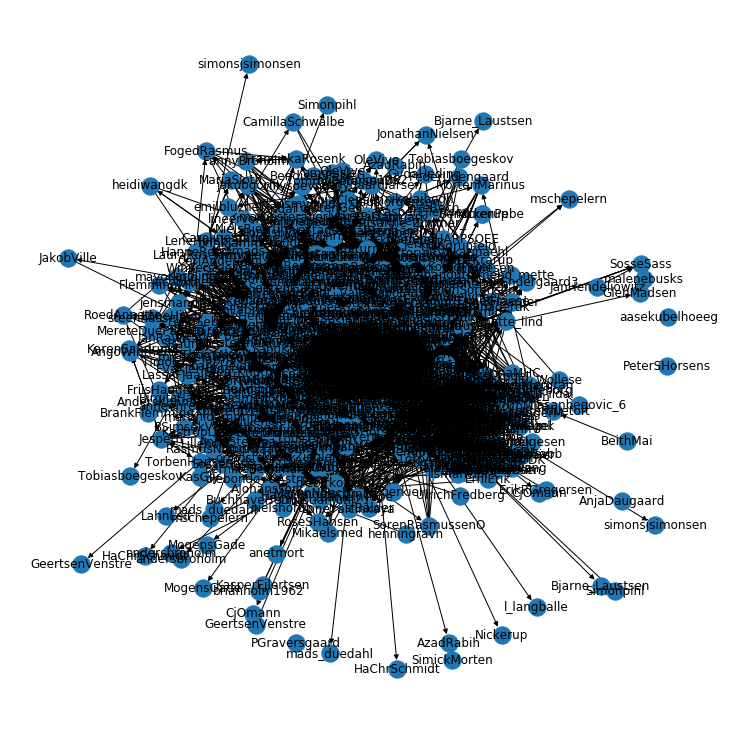

In [15]:
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(G,with_labels=True)
nx.draw(G,with_labels=True)

# New graph (with more weight if more links)

In [16]:
G2=nx.DiGraph()

In [17]:
for pol in list(tweet_dict.keys()):
    for to_pol in list(tweet_dict[pol].keys()):
            if G2.has_edge(pol, to_pol):
                # we added this one before, just increase the weight by one
                G2[pol][to_pol]['weight'] += 1
            else:
                # new edge. add with weight=1
                G2.add_edge(pol, to_pol, weight=1)

In [18]:
nx.write_gpickle(G2, "second_network_w_weights.gpickle")